In [12]:
!conda env list

# conda environments:
#
base                     C:\Users\NghiTram\anaconda3
aihub_covid19_cough      C:\Users\NghiTram\anaconda3\envs\aihub_covid19_cough
kaggleEnv                C:\Users\NghiTram\anaconda3\envs\kaggleEnv
tfod_api                 C:\Users\NghiTram\anaconda3\envs\tfod_api
worldBank_webApp      *  C:\Users\NghiTram\anaconda3\envs\worldBank_webApp



In [1]:
import requests
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD')
r.text

'ï»¿<?xml version="1.0" encoding="utf-8"?>\r\n<wb:data page="1" pages="2" per_page="50" total="61" sourceid="2" sourcename="World Development Indicators" lastupdated="2021-07-30" xmlns:wb="http://www.worldbank.org">\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current US$)</wb:indicator>\r\n    <wb:country id="BR">Brazil</wb:country>\r\n    <wb:countryiso3code>BRA</wb:countryiso3code>\r\n    <wb:date>2020</wb:date>\r\n    <wb:value>1444733258971.65</wb:value>\r\n    <wb:unit />\r\n    <wb:obs_status />\r\n    <wb:decimal>0</wb:decimal>\r\n  </wb:data>\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current US$)</wb:indicator>\r\n    <wb:country id="BR">Brazil</wb:country>\r\n    <wb:countryiso3code>BRA</wb:countryiso3code>\r\n    <wb:date>2019</wb:date>\r\n    <wb:value>1877810514260.36</wb:value>\r\n    <wb:unit />\r\n    <wb:obs_status />\r\n    <wb:decimal>0</wb:decimal>\r\n  </wb:data>\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current

In [2]:
payload = {'format': 'json', 'per_page': '500', 'date':'2013:2016'}
r = requests.get('http://api.worldbank.org/v2/countries/cn;in/indicators/SP.POP.GROW', params=payload)
r.json()[1]

from collections import defaultdict
data_PG = defaultdict(list)

for entry in r.json()[1]:
    # check if country is already in dictionary. 
    if data_PG[entry['country']['value']]:
        data_PG[entry['country']['value']][0].append(int(entry['date']))
        data_PG[entry['country']['value']][1].append(float(entry['value']))       
    else: # initialize the lists that will hold the x and y values
        data_PG[entry['country']['value']] = [[],[]] 

for country in data_PG:
    print(country)
    print(data_PG[country][0])
    print(data_PG[country][1])
    print('\n')

China
[2015, 2014, 2013]
[0.508136747291937, 0.506311591779847, 0.49370963351136]


India
[2015, 2014, 2013]
[1.11689591278599, 1.14567340150608, 1.18290421490412]




In [6]:
data_PG

defaultdict(list,
            {'China': [[2015, 2014, 2013],
              [0.508136747291937, 0.506311591779847, 0.49370963351136]],
             'India': [[2015, 2014, 2013],
              [1.11689591278599, 1.14567340150608, 1.18290421490412]]})

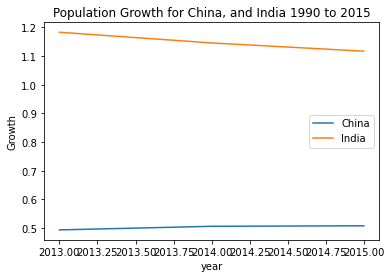

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

for country in data_PG:
    plt.plot(data_PG[country][0], data_PG[country][1], label=country)

# label the plot
plt.title('Population Growth for China, and India 1990 to 2015')
plt.legend()
plt.xlabel('year')
plt.ylabel('Growth')
plt.show()

In [10]:
# World Bank indicators of Population Growth
# , 'SP.RUR.TOTL.ZS', 'SP.RUR.TOTL.ZS', 'AG.LND.FRST.ZS'
indicators = ['AG.LND.ARBL.HA.PC']

data_frames = [] 
urls = [] 
country_filter ='cn;in'

for indicator in indicators:
    url = 'http://api.worldbank.org/v2/countries/' + country_filter +\
    '/indicators/' + indicator + '?date=1990:2015&per_page=1000&format=json'
    urls.append(url)

    try:
        r = requests.get(url)
        data = r.json()[1]
    except:
        print('could not load data ', indicator)

    for i, value in enumerate(data):
        value['indicator'] = value['indicator']['value']
        value['country'] = value['country']['value']
        
    data_frames.append(data)

In [11]:
# with ( for i, value in enumerate(data):
#         value['indicator'] = value['indicator']['value']
#         value['country'] = value['country']['value'] )
value

{'indicator': 'Arable land (hectares per person)',
 'country': 'India',
 'countryiso3code': 'IND',
 'date': '1990',
 'value': 0.187178696386395,
 'unit': '',
 'obs_status': '',
 'decimal': 2}

In [9]:
data

[{'indicator': 'Arable land (hectares per person)',
  'country': 'China',
  'countryiso3code': 'CHN',
  'date': '2015',
  'value': 0.0872167850527268,
  'unit': '',
  'obs_status': '',
  'decimal': 2},
 {'indicator': 'Arable land (hectares per person)',
  'country': 'China',
  'countryiso3code': 'CHN',
  'date': '2014',
  'value': 0.0877062458311038,
  'unit': '',
  'obs_status': '',
  'decimal': 2},
 {'indicator': 'Arable land (hectares per person)',
  'country': 'China',
  'countryiso3code': 'CHN',
  'date': '2013',
  'value': 0.0882298987755824,
  'unit': '',
  'obs_status': '',
  'decimal': 2},
 {'indicator': 'Arable land (hectares per person)',
  'country': 'China',
  'countryiso3code': 'CHN',
  'date': '2012',
  'value': 0.0888131665549958,
  'unit': '',
  'obs_status': '',
  'decimal': 2},
 {'indicator': 'Arable land (hectares per person)',
  'country': 'China',
  'countryiso3code': 'CHN',
  'date': '2011',
  'value': 0.0897532976721002,
  'unit': '',
  'obs_status': '',
  'deci